<style>
    /* Cover page styling */
    .cover-page {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        height: 100vh;
        font-family: 'Times New Roman', Times, serif;
        text-align: center;
    }
    .title {
        font-size: 36px;
        font-weight: bold;
        margin-bottom: 20px;
    }
    .subtitle {
        font-size: 24px;
        margin-bottom: 40px;
    }
    .author, .institution, .student-id, .date {
        font-size: 18px;
        margin-bottom: 10px;
    }

    /* General styling for all Markdown cells */
    div.text_cell_render {
        font-family: 'Times New Roman', Times, serif;
        font-size: 14px; /* Adjust this size as needed */
    }
</style>

<div class="cover-page">
    <div class="title">Final Project</div>
    <div class="author">Author: Beyza Kordan</div>
    <div class="institution">MSc in Economics and Data Analytics, University College Dublin</div>
    <div class="student-id">Student ID: 23205963</div>
    <div class="date">Date: 2 December 2024</div>
</div>


**Question 1**
**(a) Load the winequality-red.csv dataset into Python as a pandas DataFrame**

In [1]:
# Importing library
import pandas as pd

# Loading the Red Wine dataset
file_path = r'C:\Users\pc\Desktop\winequality-red.csv'
red_wine_data = pd.read_csv(file_path, sep=';')

# Displaying the dataset
styled_df = (
    red_wine_data.head()
    .style.set_properties(**{'text-align': 'center'})
    .format(precision=1)
    .hide(axis='index'))

print("\033[1m🍷 Wine Quality - Red\033[0m\n")
display(styled_df)

🍷 Wine Quality - Red



FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,Free SulfurDioxide,Total SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
7.4,0.7,0.0,1.9,0.1,11.0,34.0,1.0,3.5,0.6,9.4,5
7.8,0.9,0.0,2.6,0.1,25.0,67.0,1.0,3.2,0.7,9.8,5
7.8,0.8,0.0,2.3,0.1,15.0,54.0,1.0,3.3,0.7,9.8,5
11.2,0.3,0.6,1.9,0.1,17.0,60.0,1.0,3.2,0.6,9.8,6
7.4,0.7,0.0,1.9,0.1,11.0,34.0,1.0,3.5,0.6,9.4,5


**(b) Inspect the data. 
How many wines are included in this dataset?
How many different indicators are included? 
Does this dataset contain any missing values?**

In [3]:
# Number of wines in the dataset 
num_wines = len(red_wine_data)

# Number of different indicators 
num_indicators = red_wine_data.shape[1]

# Checking for missing values
missing_values = red_wine_data.isnull().sum().sum()

# Printing the results
print("\033[1m🍷 Wine Dataset Inspection - Red\033[0m\n")
print("Number of wines:", num_wines)
print("Number of different indicators:", num_indicators)
print("Number of missing values:", missing_values)

🍷 Wine Dataset Inspection - Red

Number of wines: 1599
Number of different indicators: 12
Number of missing values: 0


**(c) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results.**

In [5]:
# Loading the dataset
file_path = r'C:\Users\pc\Desktop\winequality-red.csv'
red_wine_data = pd.read_csv(file_path, sep=';')
pd.set_option('display.float_format', '{:.2f}'.format)

# Generating the numerical summary
numerical_summary = red_wine_data.describe()

# Formatting the summary
formatted_summary = (
    numerical_summary.style
    .set_properties(**{'text-align': 'center'})
    .format(precision=1))

# Displaying the results
print("\033[1m🍷 Exploratory Data Analysis: Descriptive Statistics\n")
formatted_summary

🍷 Exploratory Data Analysis: Descriptive Statistics



,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,Free SulfurDioxide,Total SulfurDioxide,Density,pH,Sulphates,Quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.3,0.5,0.3,2.5,0.1,15.9,46.5,2.2,3.3,0.7,5.6
std,1.7,0.2,0.2,1.4,0.0,10.5,32.9,9.7,0.2,0.2,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,22.0,1.0,3.2,0.6,5.0
50%,7.9,0.5,0.3,2.2,0.1,14.0,38.0,1.0,3.3,0.6,6.0
75%,9.2,0.6,0.4,2.6,0.1,21.0,62.0,1.0,3.4,0.7,6.0
max,15.9,1.6,1.0,15.5,0.6,72.0,289.0,100.4,4.0,2.0,8.0


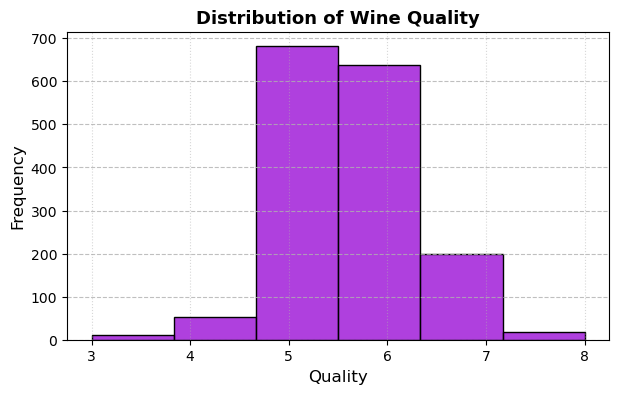

In [7]:
# 1. Distribution of Wine Quality
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.histplot(data=red_wine_data, x='Quality', bins=6, kde=False, color='darkviolet')
plt.title('Distribution of Wine Quality', fontsize=13, fontweight='bold')
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.grid(axis='x', linestyle=':', alpha=0.5)  
plt.show()

The histogram depicts the distribution of quality scores for red wine as determined by sensory evaluations. The majority of wines receive ratings between 5 and 6, with 6 being the most frequently occurring score, while scores range from 3 (deficient) to 8 (exceptional). The quality of wine is naturally disparate, as average-quality wines dominate the market. This distribution demonstrates this. The rarity of both premium and substandard wines is underscored by the low frequency of wines rated higher (7 and 8) and those rated lower (3 and 4). Consistent with the data presented, this discovery suggests that the distribution of wine samples is not uniformly distributed across quality levels. The discrepancy underscores the challenge of improving wine quality to achieve high ratings and implies the necessity of production strategies that are specifically designed for premium wines. In addition, the insufficient representation of the extreme quality categories may pose challenges in the accurate modeling of this data.

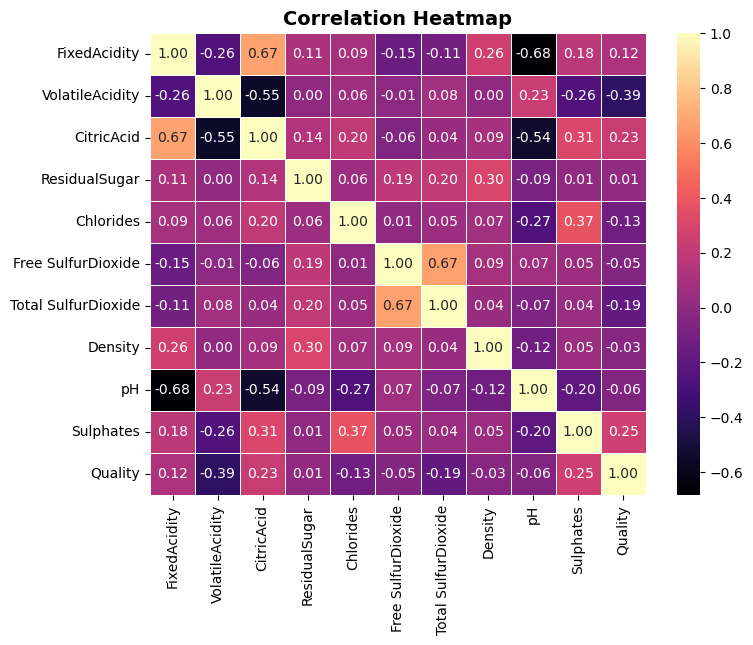

In [9]:
# 2. Correlation Heatmap
correlation_matrix = red_wine_data.corr(numeric_only=True)

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

As seen above on the correlation heatmap shows strong relationships between physicochemical variables and wine quality. Alcohol has the strongest positive connection with quality (0.48), meaning wines with greater alcohol levels are rated better, making it an important measurement of wine quality. However, volatile acidity has a slight negative connection with quality (-0.39), indicating the necessity for acidity regulation in winemaking. A modest positive association (0.25) shows that sulphates improve microbiological stability and wine quality when applied properly.

Residual sugar, density, and pH exhibit little relationships with sensory ratings. Fixed acidity and citric acid (0.67) and free sulfur dioxide and total sulfur dioxide (0.67) are strongly correlated, highlighting their combined influence on the acidity profile and wine preservation. High chloride levels, combined with salinity, could negatively impact wine ratings due to the weak negative association between chlorides and quality (-0.13).

In practice, wine quality is improved by increasing alcohol, decreasing volatile acidity, and adjusting sulphate levels. Quality should also be maintained by managing variable connections, especially sulfur dioxide levels. These findings highlight predictive modeling and strategic modifications, improving production and wine physicochemical properties.

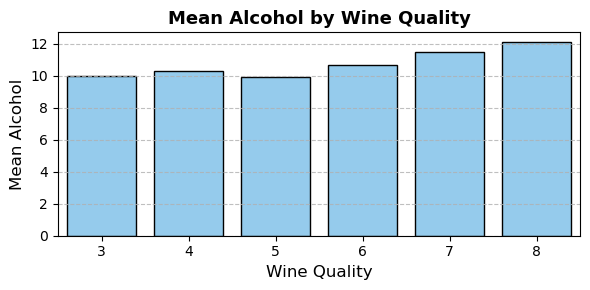

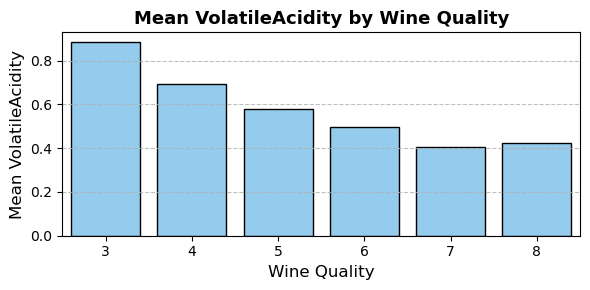

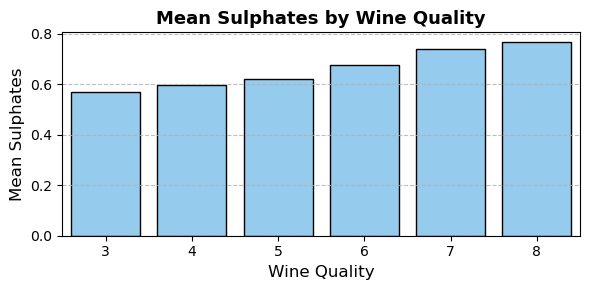

In [11]:
# 3. Mean Values of Selected Variables by Wine Quality
selected_variables = ['Alcohol', 'VolatileAcidity', 'Sulphates']

# Making sure that 'Quality' are numeric
for col in selected_variables + ['Quality']:
    red_wine_data[col] = pd.to_numeric(red_wine_data[col], errors='coerce')

# Group by 'Quality' and calculate mean values for the selected variables
mean_values = red_wine_data.groupby('Quality')[selected_variables].mean()

# Generating bar plots for each variable
for var in selected_variables:
    plt.figure(figsize=(6, 3))
    sns.barplot(x=mean_values.index, y=mean_values[var], color='lightskyblue', edgecolor='black')
    plt.title(f'Mean {var} by Wine Quality', fontsize=13, fontweight='bold')
    plt.xlabel('Wine Quality', fontsize=12)
    plt.ylabel(f'Mean {var}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.8)
    plt.tight_layout()
    plt.show()

The bar graphs depict essential correlations between wine quality and its physicochemical characteristics. The "Mean Alcohol by Wine Quality" graph demonstrates an upward trend in the alcohol concentration of higher-quality wines. This indicates that the alcohol concentration of wine substantially enhances its sensory allure.

The graphic illustrating "Mean Volatile Acidity by Wine Quality" demonstrates a downward trend, signifying that higher wine quality correlates with lower volatile acidity. This corresponds with the notion that volatile acidity, linked to unpleasant flavors, negatively impacts wine quality.

The "Mean Sulphates by Wine Quality" graphic illustrates a little positive correlation, indicating that regulated sulfate concentrations enhance the preservation and taste equilibrium of superior wines.

In summary, our data suggest that the creation of high-quality wines requires moderate sulfate concentrations, decreased volatile acidity, and elevated alcohol content.cohol.

**Question 2**
**(a) Load the winequality-white.csv dataset into Python as a pandas DataFrame.**

In [13]:
# Loading the White Wine dataset
file_path = r'C:\Users\pc\Desktop\winequality-white.csv'
white_wine_data = pd.read_csv(file_path, sep=';')
print("\033[1m🥂 Wine Quality - White\033[0m\n")

# Displaying the dataset
styled_df = (
    white_wine_data.head()
    .style.set_properties(**{'text-align': 'center'})
    .format(precision=1)
    .hide(axis='index'))

# Display the styled DataFrame in Jupyter Notebook
from IPython.display import display
display(styled_df)

🥂 Wine Quality - White



FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,Free SulfurDioxide,Total SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
7.0,0.3,0.4,20.7,0.0,45.0,170.0,1.0,3.0,0.5,8.8,6
6.3,0.3,0.3,1.6,0.0,14.0,132.0,1.0,3.3,0.5,9.5,6
8.1,0.3,0.4,6.9,0.1,30.0,97.0,1.0,3.3,0.4,10.1,6
7.2,0.2,0.3,8.5,0.1,47.0,186.0,1.0,3.2,0.4,9.9,6
7.2,0.2,0.3,8.5,0.1,47.0,186.0,1.0,3.2,0.4,9.9,6


**b) Inspect the data. How many wines are included in this dataset? Are the indicators the same as those in the red wine group?**

In [15]:
print("\033[1m🥂 Wine Dataset Inspection - White\033[0m\n")

# Number of wines in the white wine dataset 
num_wines = len(white_wine_data)

# Number of different indicators in the white wine dataset
num_indicators = len(white_wine_data.columns.unique())

# Printing the results
print(f"Number of wines: {num_wines}")
print(f"Number of different indicators: {num_indicators}")

# Checking if indicators are the same as red wine
same_indicators = list(white_wine_data.columns) == list(red_wine_data.columns)
print(f"Are the indicators the same as the red wine group? {'Yes' if same_indicators else 'No'}")

🥂 Wine Dataset Inspection - White

Number of wines: 4898
Number of different indicators: 12
Are the indicators the same as the red wine group? Yes


**c) Perform a t-test, for each of the measurements, to test whether any of the indicators differ between the red and the white groups. Use a significance level of α = 0.01. Display the t-score and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.**

In [17]:
# Importing necessary libraries
import pandas as pd
from scipy.stats import ttest_ind, levene

# Loading the datasets
red_file_path = r'C:\Users\pc\Desktop\winequality-red.csv'
white_file_path = r'C:\Users\pc\Desktop\winequality-white.csv'
red_wine_data = pd.read_csv(red_file_path, sep=';')
white_wine_data = pd.read_csv(white_file_path, sep=';')

# Selecting numeric columns excluding 'Quality'
numeric_columns = [col for col in red_wine_data.columns if col != 'Quality']

# Making sure all columns contain only numeric data
for col in numeric_columns:
    red_wine_data[col] = pd.to_numeric(red_wine_data[col], errors='coerce')
    white_wine_data[col] = pd.to_numeric(white_wine_data[col], errors='coerce')

# Setting a significance level
alpha = 0.01

# Printing the results
print("\033[1m🧾 T-Test Results\033[0m\n")
print(f"{'Variable':<20} {'Levene p-Value':<15} {'t-Statistic':<15} {'p-Value':<15} {'Significant':<15}")
print("-" * 80)

# Perform tests for each numeric column
for col in numeric_columns:
    red_values = red_wine_data[col].dropna().values
    white_values = white_wine_data[col].dropna().values

    # Ensuring both arrays contain valid data
    if len(red_values) == 0 or len(white_values) == 0:
        print(f"{col:<20} {'NA':<15} {'NA':<15} {'NA':<15} {'Excluded':<15}")
        continue

    # Performing Levene's test for variance equality
    levene_p = levene(red_values, white_values).pvalue
    equal_var = levene_p >= alpha

    # Performing t-test
    t_stat, p_value = ttest_ind(red_values, white_values, equal_var=equal_var)

    # Determine significance
    significant = p_value < alpha

    # Print formatted results
    print(f"{col:<20} {levene_p:<15.4f} {t_stat:<15.4f} {p_value:<16.4f} {'Yes' if significant else 'No':<15}")

print("-" * 80)

🧾 T-Test Results

Variable             Levene p-Value  t-Statistic     p-Value         Significant    
--------------------------------------------------------------------------------
FixedAcidity         0.0000          32.4227         0.0000           Yes            
VolatileAcidity      0.0000          53.0591         0.0000           Yes            
CitricAcid           0.0000          -12.2290        0.0000           Yes            
ResidualSugar        0.0000          -47.8022        0.0000           Yes            
Chlorides            0.0000          34.2402         0.0000           Yes            
Free SulfurDioxide   0.0000          -54.4279        0.0000           Yes            
Total SulfurDioxide  0.0000          -89.8721        0.0000           Yes            
Density              0.0028          2.5331          0.0114           No             
pH                   0.4877          28.0900         0.0000           Yes            
Sulphates            0.0000          37.05

The t-test results reveal significant differences between red and white wines for the majority of evaluated variables at a significance threshold of α = 0.01. All variables, except for density, exhibited statistically significant differences, since their p-values were below 0.01. This compels us to dismiss the null hypothesis for the majority of variables, indicating that these measures differ between the two wine kinds. The density variable does not exhibit a significant difference (p-value = 0.0116), indicating that we fail to reject the null hypothesis for this variable. 

**d) Compare the two data sets using appropriate graphical means.**

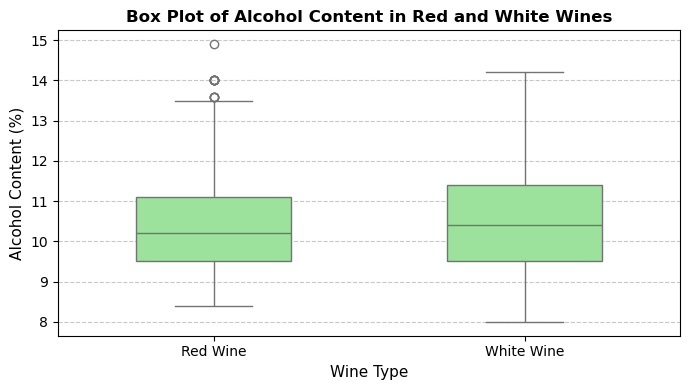

In [19]:
red_wine_data = red_wine_data.copy()
white_wine_data = white_wine_data.copy()

# Adding a 'type' column to both datasets
red_wine_data.loc[:, 'type'] = 'Red Wine'
white_wine_data.loc[:, 'type'] = 'White Wine'

# Combining datasets
combined_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Creating a box plot for alcohol content
plt.figure(figsize=(7, 4))
sns.boxplot(data=combined_data, x='type', y='Alcohol', width=0.5, color='lightgreen')
plt.title('Box Plot of Alcohol Content in Red and White Wines', fontsize=12, fontweight='bold')
plt.xlabel('Wine Type', fontsize=11)
plt.ylabel('Alcohol Content (%)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In the box plot, the alcohol content of white and red wines is compared. The median alcohol content of red wines is somewhat more than that of white wines, indicating that alcohol levels are often elevated. The fact that both have low interquartile ranges (IQRs) suggests that the alcohol content of most wines is consistent.

There are outliers for both types, with some wines having notably greater alcohol content. White wines have longer whiskers and a somewhat broader range than red wines, indicating a larger degree of alcohol volatility.

In general, red wines have a greater and more consistent alcohol content, while white wines fluctuate more, perhaps because of differences in grape qualities and winemaking techniques.

**Question 3**
**(a) Combine the two datasets into a single DataFrame.**

In [21]:
# Adding a column to distinguish between red and white wines
red_wine_data.loc[:, 'Type'] = 'Red Wine'
white_wine_data.loc[:, 'Type'] = 'White Wine'

# Combining the datasets into a DataFrame
combined_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)
preview_data = pd.concat([red_wine_data.head(3), white_wine_data.head(3)], ignore_index=True)

# Displaying the table 
print("\033[1m🥂🍷 Combined Wine Quality\033[0m\n")

styled_preview = (
    preview_data.style
    .set_properties(**{'text-align': 'center'})  
    .format(precision=1)                        
    .hide(axis='index'))

styled_preview

🥂🍷 Combined Wine Quality



FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,Free SulfurDioxide,Total SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality,type,Type
7.4,0.7,0.0,1.9,0.1,11.0,34.0,1.0,3.5,0.6,9.4,5,Red Wine,Red Wine
7.8,0.9,0.0,2.6,0.1,25.0,67.0,1.0,3.2,0.7,9.8,5,Red Wine,Red Wine
7.8,0.8,0.0,2.3,0.1,15.0,54.0,1.0,3.3,0.7,9.8,5,Red Wine,Red Wine
7.0,0.3,0.4,20.7,0.0,45.0,170.0,1.0,3.0,0.5,8.8,6,White Wine,White Wine
6.3,0.3,0.3,1.6,0.0,14.0,132.0,1.0,3.3,0.5,9.5,6,White Wine,White Wine
8.1,0.3,0.4,6.9,0.1,30.0,97.0,1.0,3.3,0.4,10.1,6,White Wine,White Wine


**b) Compute the Pearson correlation coefficient between each of the measurements and identify which indicators are most correlated. List the four most strongly correlated pairs.**


📈 Most Strongly Correlated Pairs



Variable1,Variable2,Correlation
Free SulfurDioxide,Total SulfurDioxide,0.72
ResidualSugar,Total SulfurDioxide,0.50
VolatileAcidity,Total SulfurDioxide,-0.41
ResidualSugar,Free SulfurDioxide,0.40


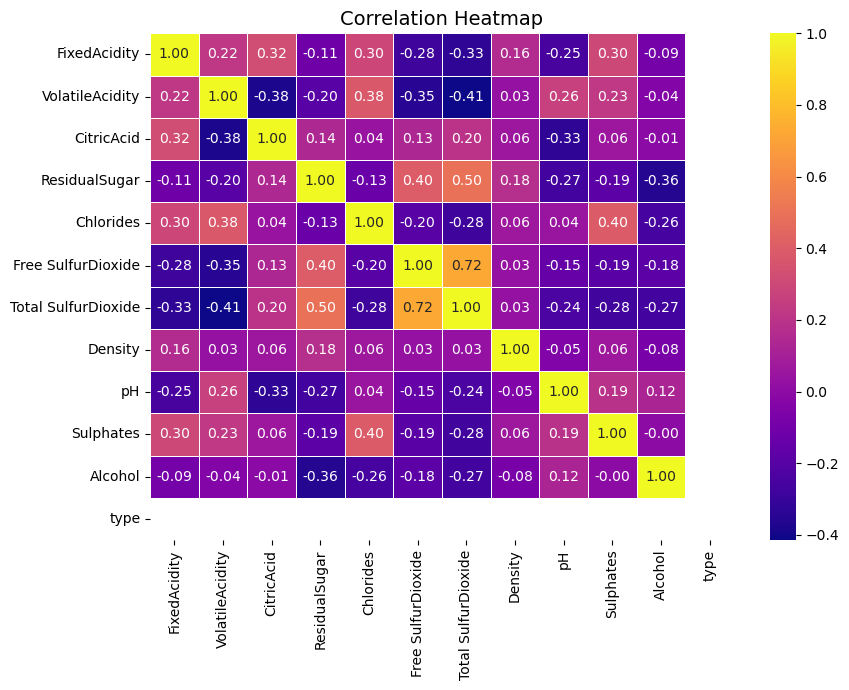

In [23]:
# Selecting numeric columns
numeric_columns = [col for col in combined_data.columns if col not in ['Quality', 'Type']]
combined_data[numeric_columns] = combined_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Computing the Pearson correlation matrix
correlation_matrix = combined_data[numeric_columns].corr()

# Unstacking the matrix and processing correlation pairs
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Removing self-correlations and duplicates
correlation_pairs = correlation_pairs[
    correlation_pairs['Variable1'] != correlation_pairs['Variable2']
].drop_duplicates(subset=['Correlation'], keep='first')

# Sorting values by absolute correlation values
correlation_pairs['AbsCorrelation'] = correlation_pairs['Correlation'].abs()
correlation_pairs = correlation_pairs.sort_values(by='AbsCorrelation', ascending=False)

# Extracting the top 4 most strongly correlated pairs
top_4_correlations = correlation_pairs.head(4)

# Style the top 4 correlations
styled_top_4 = (
    top_4_correlations[['Variable1', 'Variable2', 'Correlation']]
    .style
    .set_properties(**{'text-align': 'center'})
    .format({'Correlation': '{:.2f}'})
    .hide(axis="index")
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f4f4f4'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('padding', '8px')]},]))

print("\n\033[1m📈 Most Strongly Correlated Pairs\033[0m\n")
display(styled_top_4)

# Plotting the heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In the combined wine dataset, the correlation analysis emphasizes the substantial relationships between key variables. The strongest positive correlation is observed between Total Sulfur Dioxide and Free Sulfur Dioxide (0.72), as anticipated, as free sulfur dioxide directly contributes to the total quantity. This relationship is essential for the preservation of wine. There is also a positive link between total sulfur dioxide (0.50) and residual sugar, suggesting that sweeter wines usually need more sulfur dioxide to be preserved. Similarly, the moderate positive correlation between Residual Sugar and Free Sulfur Dioxide (0.40) underscores the relationship between preservation techniques and sweetness.

A negative association (-0.42) is seen between Total Sulfur Dioxide and Volatile Acidity, indicating that increased acidity levels are often alleviated by diminished sulfur dioxide levels. This equilibrium is expected to maintain the wine's chemical stability and taste character.

The results are illustrated by the correlation heatmap, with warmer hues representing positive connections and colder hues denoting negative correlations. While certain indicators have substantial relationships, many others show weak or negligible links, indicating that they independently affect wine quality.al and sensory attributes, while also improving quality control mechanisms.

**c) Create scatter plots for the each of the correlated pairs identified in Q3(b). Are the relationships as expected from the correlation coefficients?**

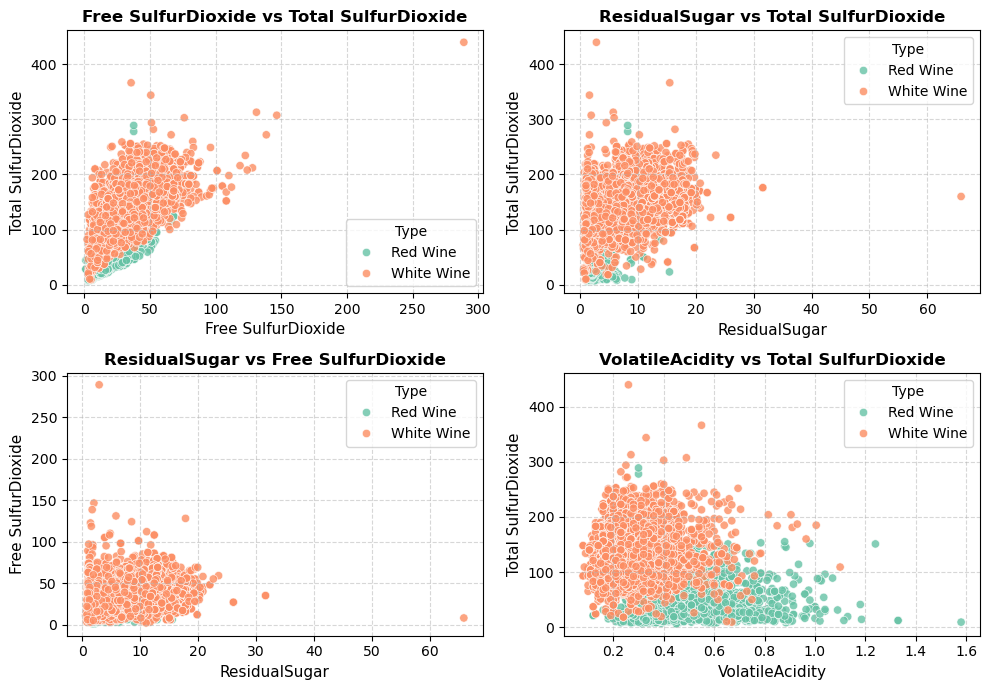

In [25]:
# Defining the correlated pairs identified in Q3(b)
correlated_pairs = [
    ('Free SulfurDioxide', 'Total SulfurDioxide'),
    ('ResidualSugar', 'Total SulfurDioxide'),
    ('ResidualSugar', 'Free SulfurDioxide'),
    ('VolatileAcidity', 'Total SulfurDioxide')]

# Creating scatter plots for each pair
plt.figure(figsize=(10, 7))
for i, (var1, var2) in enumerate(correlated_pairs, 1):
    if var1 in combined_data.columns and var2 in combined_data.columns:
        plt.subplot(2, 2, i)
        sns.scatterplot(data=combined_data, x=var1, y=var2, hue='Type', alpha=0.8, palette='Set2')
        plt.title(f'{var1} vs {var2}', fontsize=12, fontweight='bold')
        plt.xlabel(var1, fontsize=11)
        plt.ylabel(var2, fontsize=11)
        plt.grid(linestyle='--', alpha=0.5)

# Displaying the plots
plt.tight_layout()
plt.show()

The correlation coefficients' indicated links are supported by the scatter plots. There is a noticeable clustering and a significant positive linear association (0.72) between free sulfur dioxide and total sulfur dioxide. Although there is considerable fluctuation, both residual sugar vs. total sulfur dioxide (0.50) and residual sugar vs. free sulfur dioxide (0.40) show moderately favorable trends. As anticipated, there is a somewhat negative correlation between volatile acidity and total sulfur dioxide (-0.41), with higher volatile acidity translating into lower total sulfur dioxide. Stronger correlations exhibit tighter patterns, whereas lower correlations show wider dispersion, according to the scatter plots, which generally match the correlation coefficients well.

**Question 4**
**Linear regression to predict wine quality.**
**(Wine quality scores to be used as dependent variable)**
**(a) We consider wine with a quality score from 0 to 5 as being POOR, while quality scores from 6-10 are considered GOOD. Create a new column in the dataframe indicating whether the wine is POOR or GOOD.**

In [27]:
# Creating a new column 'QualityCategory' as 'GOOD' or 'POOR'
combined_data['QualityCategory'] = combined_data['Quality'].apply(lambda x: 'POOR' if x <= 5 else 'GOOD')

# Styled Quality Category Distribution
print("\n📊 🍷 \033[1mQuality Category Distribution\033[0m:\n")
quality_distribution = combined_data['QualityCategory'].value_counts()
print(f"{'QualityCategory':<15}{'Count':>10}")
print("-" * 30)
for category, count in quality_distribution.items():
    print(f"{category:<15}{count:>10}")

# Styled Sample of Combined Data
print("\n❗ \033[1mSample of Combined Data with Quality Category\033[0m:\n")
sample_data = combined_data[['Quality', 'QualityCategory', 'Type']].head()
print(f"{'Quality':<10}{'QualityCategory':<20}{'Type':<15}")
print("-" * 45)
for _, row in sample_data.iterrows():
    print(f"{row['Quality']:<10}{row['QualityCategory']:<20}{row['Type']:<15}")


📊 🍷 Quality Category Distribution:

QualityCategory     Count
------------------------------
GOOD                 4113
POOR                 2384

❗ Sample of Combined Data with Quality Category:

Quality   QualityCategory     Type           
---------------------------------------------
5         POOR                Red Wine       
5         POOR                Red Wine       
5         POOR                Red Wine       
6         GOOD                Red Wine       
5         POOR                Red Wine       


**(b) Separate the data into response and predictor variables and standardise the predictor variables.**

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Combining datasets
red_wine_data['Type'] = 'Red Wine'
white_wine_data['Type'] = 'White Wine'
combined_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Separating the predictor variables 
predictors = combined_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Quality'])

# Shortening the variable names for better alignment
shortened_columns = {
    'FixedAcidity': 'FixedAcid',
    'VolatileAcidity': 'VolatileAcid',
    'CitricAcid': 'CitricAcid',
    'Free SulfurDioxide': 'FreeSO2',
    'Total SulfurDioxide': 'TotalSO2',
}
predictors.columns = [shortened_columns.get(col, col) for col in predictors.columns]

# Standardizing the predictor variables
scaler = StandardScaler()
standardized_predictors = pd.DataFrame(
    scaler.fit_transform(predictors),
    columns=predictors.columns)

standardized_predictors_rounded = standardized_predictors.head().round(3)
print("\n\033[1m🔍 Standardized Predictor Variables (First 5 Rows)\033[0m\n")

# Ensuring proper alignment
col_width = 14
header_format = f"{{:<{col_width}}}" * len(standardized_predictors_rounded.columns)
row_format = f"{{:<{col_width}.3f}}" * len(standardized_predictors_rounded.columns)
print(header_format.format(*standardized_predictors_rounded.columns))

# Printing results
for _, row in standardized_predictors_rounded.iterrows():
    print(row_format.format(*row))


🔍 Standardized Predictor Variables (First 5 Rows)

FixedAcid     VolatileAcid  CitricAcid    ResidualSugar Chlorides     FreeSO2       TotalSO2      Density       pH            Sulphates     Alcohol       
0.142         2.189         -2.193        -0.745        0.570         -1.100        -1.446        -0.093        1.813         0.193         -0.913        
0.451         3.282         -2.193        -0.598        1.198         -0.311        -0.862        -0.094        -0.115        1.000         -0.578        
0.451         2.553         -1.918        -0.661        1.027         -0.875        -1.092        -0.093        0.258         0.798         -0.578        
3.074         -0.362        1.661         -0.745        0.541         -0.762        -0.986        -0.093        -0.364        0.328         -0.578        
0.142         2.189         -2.193        -0.745        0.570         -1.100        -1.446        -0.093        1.813         0.193         -0.913        


**c) Fit a linear regression model and interpret the fitted model.**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = standardized_predictors  # Standardized predictor variables
y = combined_data['Quality']  # Response variable

# Dropping any rows with NaN in predictors or response
valid_indices = X.dropna().index.intersection(y.dropna().index)
X = X.loc[valid_indices]
y = y.loc[valid_indices]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making sure that there are no missing values in training or testing sets
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  

# Fitting the OLS model using statsmodels
X_train_with_const = sm.add_constant(X_train)  
model = sm.OLS(y_train, X_train_with_const).fit()

# Display summary of the regression model
print("\n📊 \033[1mOLS Regression Model Summary\033[0m\n")
summary = model.summary()
print(summary)

# Evaluating the model on the test set
X_test_with_const = sm.add_constant(X_test)  # Add constant term for prediction
y_pred = model.predict(X_test_with_const)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results 
print("\n📋 \033[1mModel Evaluation Metrics\033[0m\n")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


📊 OLS Regression Model Summary

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     197.2
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:58:31   Log-Likelihood:                -5751.2
No. Observations:                5165   AIC:                         1.153e+04
Df Residuals:                    5153   BIC:                         1.161e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

The linear regression model determines the factors influencing wine quality. The predictors explain about 29.6% of the variance in wine quality, shown by a R² value of 0.296 in the training dataset. The adjusted R² is slightly decreased to 0.295, signifying a little penalty for the number of predictors and reducing the likelihood of overfitting. R2 on test data, on the other hand, decreased to 0.26, indicating a significant overfitting and a decrease in model efficacy on unknown data. The mean squared error (MSE) of 0.54 for the test set indicates the average squared difference between predicted and actual wine quality ratings.

Volatile acidity is the most substantial negative predictor of wine quality, with a value of -1.4459 (p<0.001). Sulfates and alcohol have considerable positive effects, with values of 0.6167 and 0.3366, respectively (p<0.001). Other factors, such as Residual Sugar and pH, have tiny but statistically significant effects, whereas characteristics like Chlorides and Density do not significantly impact wine quality (p>0.05).

The condition number of 4.93e+03 signifies probable multicollinearity, implying that various predictors may demonstrate substantial association, hence undermining the reliability and interpretability of the coefficients. The model reveals substantial correlations between variables and wine quality; however, its moderate performance and signs of multicollinearity suggest that further optimization, including addressing multicollinearity and validating through cross-validation, could enhance its robustness and accuracy.

**(d) Perform forward selection for your regression model using the Akaike Information Criterion (AIC). Examine the selected model and discuss your findings in relation to the model fitted in part (b).**

In [33]:
import statsmodels.api as sm

# Forward selection based on AIC
def forward_selection(X, y):
    """Performs forward selection to minimize AIC."""
    remaining_predictors = list(X.columns)
    selected_predictors = []
    current_aic = float("inf")
    best_model = None

    while remaining_predictors:
        aic_with_predictors = {}
        for predictor in remaining_predictors:
            model = sm.OLS(y, sm.add_constant(X[selected_predictors + [predictor]])).fit()
            aic_with_predictors[predictor] = model.aic

        best_predictor = min(aic_with_predictors, key=aic_with_predictors.get)
        best_aic = aic_with_predictors[best_predictor]

        if best_aic < current_aic:
            current_aic = best_aic
            selected_predictors.append(best_predictor)
            remaining_predictors.remove(best_predictor)
            best_model = sm.OLS(y, sm.add_constant(X[selected_predictors])).fit()
        else:
            break

    return selected_predictors, best_model

# Predictors and response
X = standardized_predictors
y = combined_data['Quality']

# Dropping missing values 
valid_indices = X.dropna().index.intersection(y.dropna().index)
X = X.loc[valid_indices]
y = y.loc[valid_indices]

# Performing forward selection
selected_predictors, final_model = forward_selection(X, y)

# Comparing AIC of the full and selected models
full_model = sm.OLS(y, sm.add_constant(X)).fit()

print("\n\033[1m🔍 AIC Comparison\033[0m\n")
print(f"Full Model AIC: {full_model.aic:.2f}")
print(f"Selected Model AIC: {final_model.aic:.2f}")

# Highlighting the AIC directly from the regression summary
print("\n\033[1m📊 Final Model Summary\033[0m\n")
print(f"AIC of Selected Model: {final_model.aic:.2f}")
print(final_model.summary())


🔍 AIC Comparison

Full Model AIC: 14393.55
Selected Model AIC: 14391.20

📊 Final Model Summary

AIC of Selected Model: 14391.20
                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     329.4
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:58:36   Log-Likelihood:                -7186.6
No. Observations:                6457   AIC:                         1.439e+04
Df Residuals:                    6448   BIC:                         1.445e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]

The Akaike Information Criterion (AIC) identified eight variables in a fundamental regression model with forward selection: pH, alcohol, volatile acid, sulphates, residual sucrose, total SO2, free SO2, and chlorides. This model excluded weak predictors, such as density, fixed acid, and citric acid, to improve interpretability.

The selected model exhibited a similar fit and enhanced efficiency, with an AIC of 14391.20, somewhat lower than that of the whole model at 14393.55. Both models demonstrated similar variation in wine quality (R2=0.296 for the complete model compared to R2=0.290 for the chosen model). Alcohol and volatile acid are among the key predictors that exhibit consistent coefficients across models.

By including non-significant components, the full model provides a more comprehensive perspective than the forward-selected model, which strikes a compromise between simplicity and performance. Both highlight critical factors influencing wine quality, with the chosen model being more suitable for focused analysis.

**Question 5**
**Random forest regression to predict the quality of a wine.**
**(Remaining indicators to be used as predictor variables.)**
**(a) Split the data into appropriate training and test sets.**

In [37]:
from sklearn.model_selection import train_test_split

# Predictors and response
X = standardized_predictors  
y = combined_data['Quality']  

# Splitting the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying summary of the data split
print("\n\033[1m✂️ Data Split Summary\033[0m\n")
print(f"Training Set:\n- Predictors (X_train): {X_train.shape[0]} samples with {X_train.shape[1]} features")
print(f"- Response (y_train): {y_train.shape[0]} samples\n")
print(f"Test Set:\n- Predictors (X_test): {X_test.shape[0]} samples with {X_test.shape[1]} features")
print(f"- Response (y_test): {y_test.shape[0]} samples")


✂️ Data Split Summary

Training Set:
- Predictors (X_train): 5197 samples with 11 features
- Response (y_train): 5197 samples

Test Set:
- Predictors (X_test): 1300 samples with 11 features
- Response (y_test): 1300 samples


**(b) Fit a random forest regression model with 10 trees using the training data. Include the argument random_state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the quality of a wine. Discuss your findings in relation to the linear model’s fit in question 4.**


⚠️ Feature Importance from Random Forest Regressor

          Feature  Importance
10        Alcohol        0.26
1    VolatileAcid        0.13
5         FreeSO2        0.09
9       Sulphates        0.08
6        TotalSO2        0.08
3   ResidualSugar        0.07
8              pH        0.07
4       Chlorides        0.06
2      CitricAcid        0.06
7         Density        0.05
0       FixedAcid        0.05


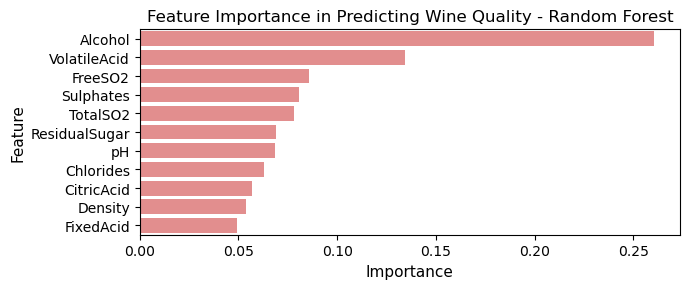


📋 Random Forest Model Evaluation Metrics

Mean Squared Error (MSE): 0.41
R-squared (R²): 0.45

📊 Model Comparison

Random Forest R²: 0.45
Linear Regression R²: 0.296


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Random Forest Regressor with 10 trees
rf_model = RandomForestRegressor(n_estimators=10, random_state=101)
rf_model.fit(X_train, y_train)

# Featuring importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Displaying the feature importance
print("\n\033[1m⚠️ Feature Importance from Random Forest Regressor\033[0m\n")
print(importance_df)

# Plotting 
plt.figure(figsize=(7, 3))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='lightcoral')
plt.title('Feature Importance in Predicting Wine Quality - Random Forest', fontsize=12)
plt.xlabel('Importance', fontsize=11)
plt.ylabel('Feature', fontsize=11)
plt.tight_layout()
plt.show()

# Evaluating Random Forest Model
y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Displaying  Random Forest evaluation metrics
print("\n\033[1m📋 Random Forest Model Evaluation Metrics\033[0m\n")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

# Comparing with Linear Regression Model (Question 4)
r2_linear = 0.296  # R² value from Question 4
print("\n\033[1m📊 Model Comparison\033[0m\n")
print(f"Random Forest R²: {r2_rf:.2f}")
print(f"Linear Regression R²: {r2_linear:.3f}")

The linear regression model generates an R2 value of 0.296, while the Random Forest model generates an R2 value of 0.45, which indicates that it accounts for 45% of the variability in wine quality. This illustrates the superior capacity of the Random Forest model to identify complex, nonlinear interactions among variables that may be neglected by the linear regression model.

The Random Forest model identifies Alcohol as the most significant predictor, assigning it a score of 0.26. This result aligns with the linear regression model, whereby alcohol had the biggest positive coefficient. Additional notable predictors in the Random Forest model are Volatile Acidity (0.13), Free Sulfur Dioxide (0.09), Sulphates (0.08), and Total Sulfur Dioxide (0.08). These factors were also significant in the linear regression model, illustrating their efficacy in forecasting wine quality. The Random Forest approach recognizes minor contributions from variables such as residual sugar, pH, and chlorides that the linear regression model could have disregarded.

In summary, the linear regression model is straightforward and uncomplicated, but the random forest model provides a more profound insight into predictor significance by leveraging its ability to capture correlations and non-linear effects. The Random Forest model is a more dependable option for predicting accuracy in this context.

**(c) Use the random forest regression model to predict the quality of a wine for the test set. Create a scatter plot of the true quality versus the predicted one. Interpret your plot.**

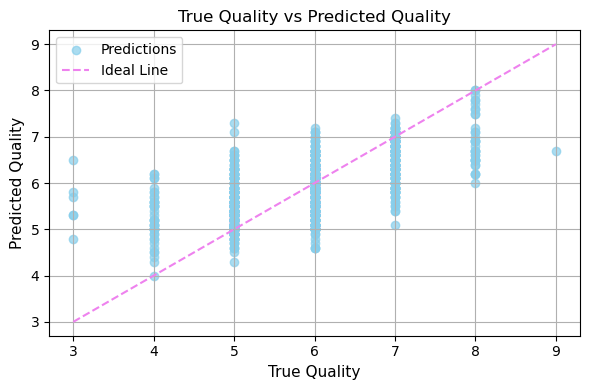

In [41]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=101)
rf_model.fit(X_train, y_train)

# Predicting the quality using the trained Random Forest model
y_pred = rf_model.predict(X_test)

# Creating a scatter plot of True Quality vs Predicted Quality
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.7, label='Predictions')
plt.title('True Quality vs Predicted Quality', fontsize=12)
plt.xlabel('True Quality', fontsize=11)
plt.ylabel('Predicted Quality', fontsize=11)
plt.grid(True)

# Plotting a diagonal line 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='violet', linestyle='--', label='Ideal Line')
plt.legend()
plt.tight_layout()
plt.show()

Results from the Random Forest regression model were positively correlated with the real wine quality, as seen in the "True Quality vs. Predicted Quality" scatter plot. There is a strong concentration of data points along the diagonal "Ideal Line," suggesting that the model is very good at predicting wine quality. 

Nonetheless, there exists considerable heterogeneity, especially with the mid-range quality scores (e.g., 5, 6, and 7), where the predictions diverge more markedly from the optimal line. This indicates that the model has difficulty accurately distinguishing wines of intermediate grade, either owing to overlapping characteristics or intrinsic complexity within the data. It's also clear that the model can't handle the less common cases of extreme quality scores (both high and low) because the results are even further from the ideal line. Overall, while the model reflects the broad trend, there is space for improvement in prediction accuracy, particularly for edge situations and scores in the mid-range cluster.

**(d) Assess the performance of a random forest regression model with 5, 10, 50, 100, 500, 1000, and 5000 trees in predicting the quality of a wine. You should repeat the model fit and prediction 20 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.**

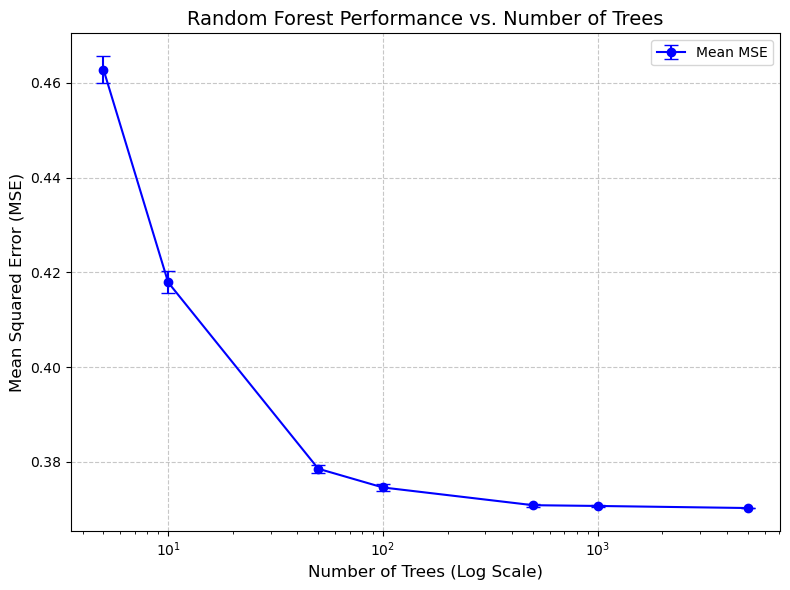

In [58]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the number of trees and repetitions
tree_counts = [5, 10, 50, 100, 500, 1000, 5000]
repeats = 20

# Initialize lists to store results
mean_mse = []
stderr_mse = []

# Loop for trees
for n_trees in tree_counts:
    mse_values = []  # Collecting MSE values 
    for random_state in range(repeats):
        # Fitting the Random Forest Regressor
        rf_model = RandomForestRegressor(n_estimators=n_trees, random_state=random_state, n_jobs=-1)
        rf_model.fit(X_train, y_train)
        
        y_pred = rf_model.predict(X_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
    
    # Calculating the mean and standard error of MSE 
    mean_mse.append(np.mean(mse_values))
    stderr_mse.append(np.std(mse_values) / np.sqrt(repeats))

# Plotting the results
plt.figure(figsize=(8, 6))
plt.errorbar(tree_counts, mean_mse, yerr=stderr_mse, fmt='o-', capsize=5, label='Mean MSE', color='blue')
plt.xscale('log')
plt.xlabel('Number of Trees (Log Scale)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Random Forest Performance vs. Number of Trees', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

The graph shows the relationship between the number of trees in a Random Forest model and the Mean Squared Error (MSE), with error bars indicating standard errors. As the quantity of trees rises, the MSE steadily decreases, indicating improved model precision. The decrease in standard error with an increased tree count signifies more dependability and consistency in predictions.

The MSE is relatively high for low tree counts, such as 5 and 10, and the error bars are larger, indicating that predictions are less reliable. Conversely, the MSE considerably decreases and ultimately stabilizes at a lower value as the tree count increases to 50 and beyond. The MSE reaches a plateau beyond 1000 trees, indicating that the number of trees does not significantly increase prediction accuracy. Consequently, the enhancements become negligible.

This trend corresponds with the core principle of Random Forests: increasing the number of trees decreases variance, leading to more stable and dependable predictions. However, above a certain threshold, the profits decrease while computational expenses escalate. The ideal balance between accuracy and computational efficiency for this dataset is attained with 500 to 1000 trees, resulting in minimal MSE and enhanced model stability.

**(e) Explain the rationale for fitting the model multiple times with different random states.**

The model underwent 20 evaluations for each tree configuration, employing several random states to mitigate variability caused by randomness in the training process. This methodology guarantees that performance measurements, such as MSE, accurately reflect the model's comprehensive behavior instead of being distorted by an isolated run. The results show that as the number of trees grows, the mean squared error stabilizes and the standard error drops, indicating increased consistency and predictability.

Quantifying uncertainty over numerous runs using standard error estimates is critical for making meaningful comparisons between setups. The research concludes that at around 500 trees, the Mean Squared Error (MSE) stabilizes, and any increases in tree count result in declining benefits. A quantity of 500 to 1000 trees ensures an optimal equilibrium between computational efficiency and prediction accuracy. Incorporating several random states renders the model's performance evaluation impartial, trustworthy, and reflective of its actual capabilities.

**Question 6**
**(a) Perform a k-means cluster analysis, using the indicators as the features. Run the clustering algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for this data.**

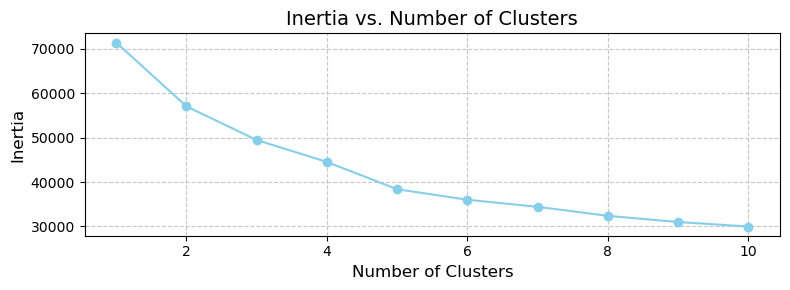

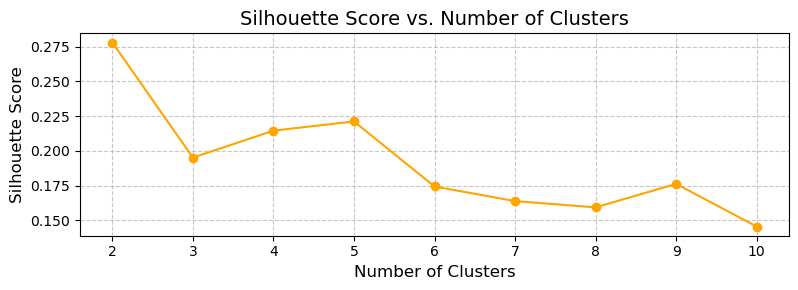

Optimal Number of Clusters Based on Silhouette Score: 2


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Ensure the predictor variables are ready (handle missing values if necessary)
X = standardized_predictors.fillna(standardized_predictors.mean())  # Replace NaN with column means

# Range of cluster numbers to evaluate
cluster_range = range(1, 11)

# Lists to store inertia and silhouette scores
inertia_list = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    else:
        silhouette_scores.append(None)

# Plot Inertia vs. Number of Clusters
plt.figure(figsize=(8, 3))
plt.plot(cluster_range, inertia_list, 'o-', label='Inertia', color='skyblue')
plt.title('Inertia vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Silhouette Score vs. Number of Clusters
plt.figure(figsize=(8, 3))
plt.plot(cluster_range[1:], silhouette_scores[1:], 'o-', label='Silhouette Score', color='orange')
plt.title('Silhouette Score vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the optimal number of clusters
optimal_clusters = cluster_range[1:][np.argmax(silhouette_scores[1:])]
print(f"Optimal Number of Clusters Based on Silhouette Score: {optimal_clusters}")

The graphics show the results of the k-means clustering experiment and are intended to aid in determining the optimal number of clusters. The Elbow Method employs a graph of "Inertia versus Number of Clusters" to demonstrate the reduction in the sum of squared distances (inertia) with an increase in the number of clusters.  Also the graph shows a significant reduction in inertia from one to three clusters, followed by more decreases. 

The "elbow" suggests that k = 2 or 3 may be optimal. The "Silhouette Score vs. Number of Clusters" graph evaluates cluster quality by measuring the effectiveness of cluster separation and cohesion. At k = 2, the optimal silhouette score is attained, indicating that two clusters yield the most effective grouping with little overlap and substantial separation.

While the Elbow Method indicates that k = 3 is a viable choice, the silhouette score shows that k = 2 yields the most consistent clustering. The data indicate that the ideal number of clusters is k = 2, representing the most effective balance between simplicity and cluster quality.y.

**(b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables.
(Hint: Create histograms for each variable, with the data separated by cluster.)**


🔔 Cluster Analysis

Cluster
0    1687
1    4810
Name: count, dtype: int64

📊 Cluster Discriminatory Analysis



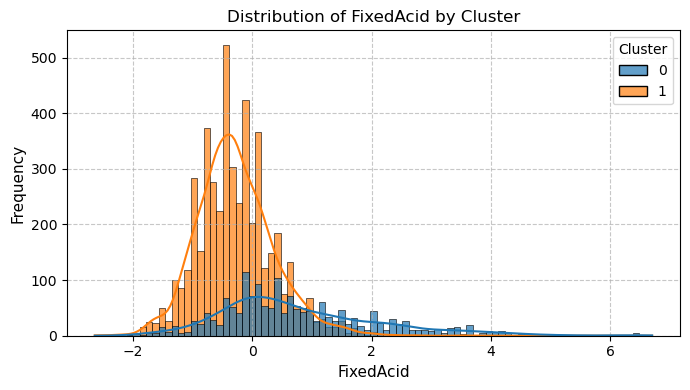

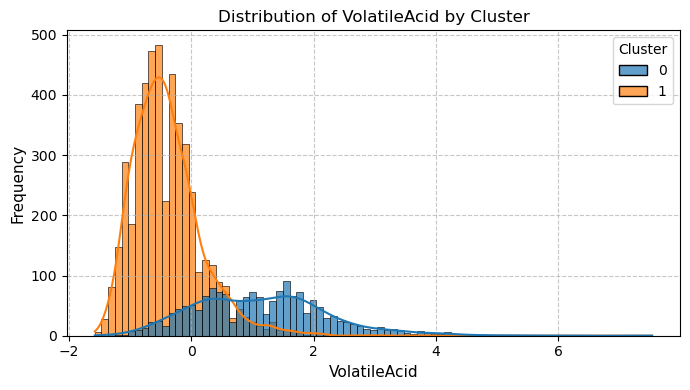

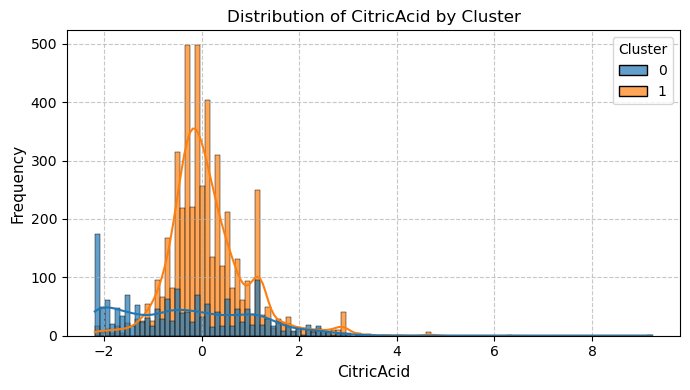

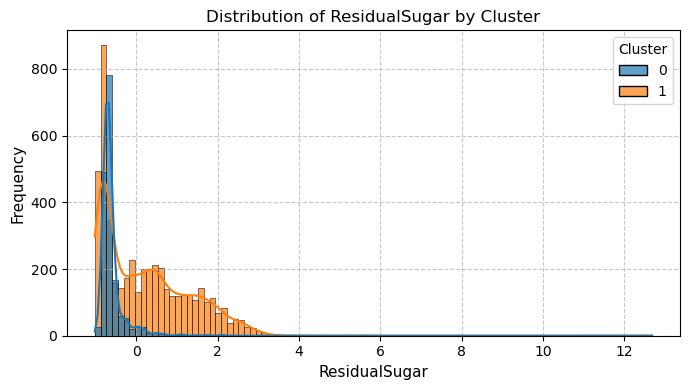

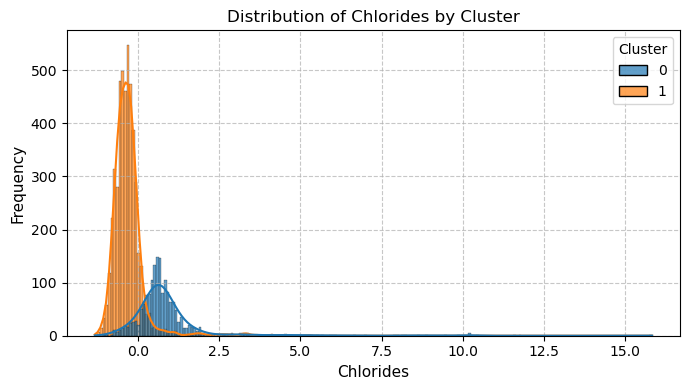

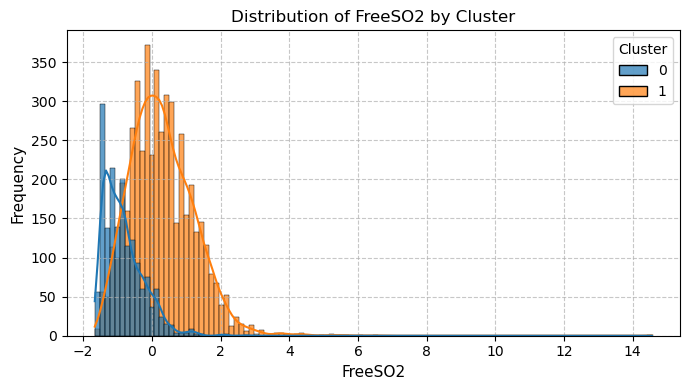

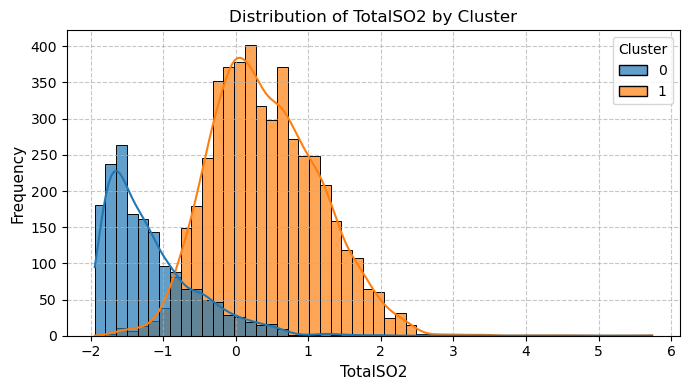

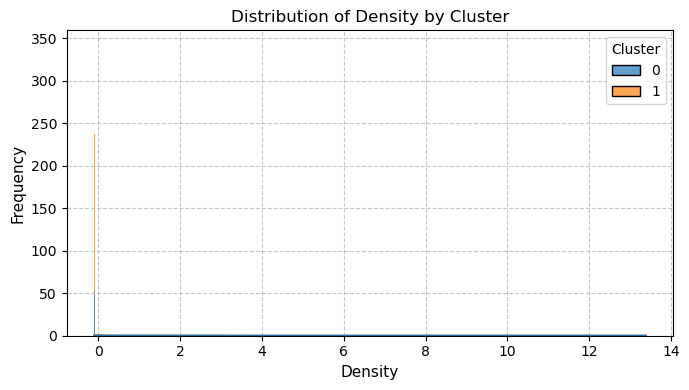

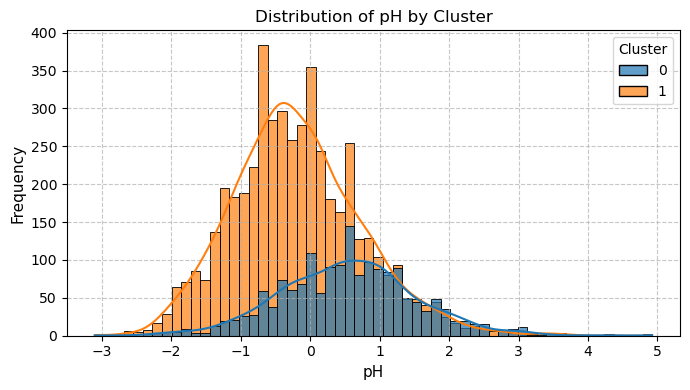

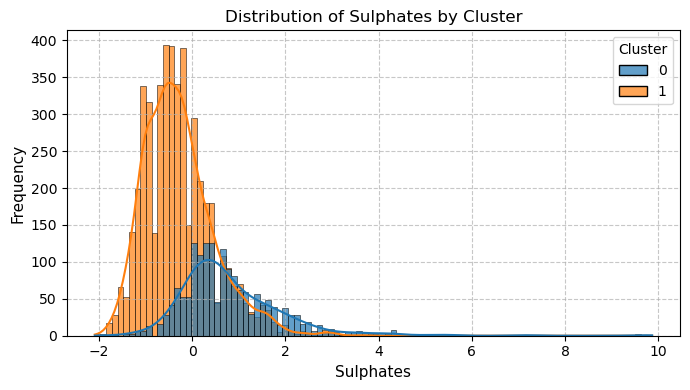

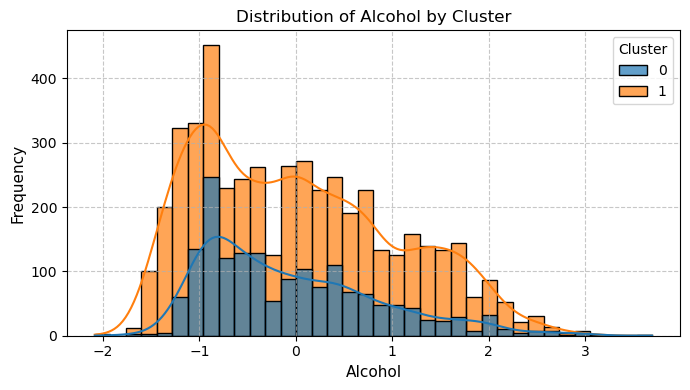

In [62]:
# Optimal number of clusters
optimal_clusters = 2  

# Handling missing values (X)
X = X.dropna()

# Performing K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
X['Cluster'] = kmeans.fit_predict(X)

# Displaying summary of cluster
print("\n🔔 Cluster Analysis\n")
print(X['Cluster'].value_counts().sort_index())

# Plotting histograms 
print("\n📊 Cluster Discriminatory Analysis\n")
for col in X.columns[:-1]:  # Exclude the 'Cluster' column
    plt.figure(figsize=(7, 4))
    sns.histplot(data=X, x=col, hue='Cluster', kde=True, palette='tab10', alpha=0.7)
    plt.title(f"Distribution of {col} by Cluster", fontsize=12)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

The histograms illustrate the distributions of standardized characteristics for the two clusters (Cluster 0 and Cluster 1) that were identified through K-means clustering. Cluster 1 in FixedAcid exhibits a distribution that is more concentrated around a slightly higher mean, whereas Cluster 0 has a wider dispersion. This demonstrates that wines from Cluster 1 have higher fixed acidity levels. Cluster 1 is associated with lower VolatileAcid values, whereas Cluster 0 has a broader range. This suggests that Cluster 1 wines may have diminished volatile acidity, which is a favorable characteristic for wine quality. The CitricAcid concentrations of Cluster 1 wines were greater than those of Cluster 0, which had a broader range of lower values. This suggests that Cluster 1 wines have a higher acidity level.

Cluster 1 wines exhibit significantly greater sugar levels, while Cluster 0 wines exhibit a wider spectrum of values, including extremely low and very high. In contrast, Cluster 0 is more variable, while Cluster 1 exhibits a more pronounced peak at lower levels, suggesting a reduction in salt concentration. Cluster 1 generally exhibits smaller distributions around moderate levels for FreeSO2 and TotalSO2, whereas Cluster 0 has a broader range, indicating that Cluster 0 wineries use more diversified preservation procedures.


Overall, these patterns demonstrate that Cluster 1 wines possess more consistent and benign chemical characteristics, which may suggest improved quality or more standardized manufacturing processes. Cluster 0 exhibits a greater degree of variability, which may suggest that the wine quality is more diverse or that the quantities are of inferior quality.

**(c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings.**

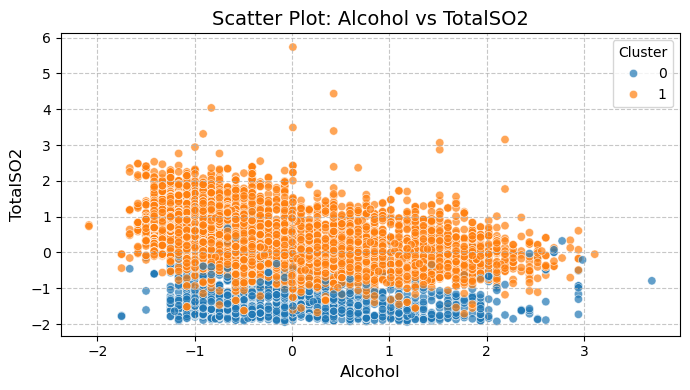

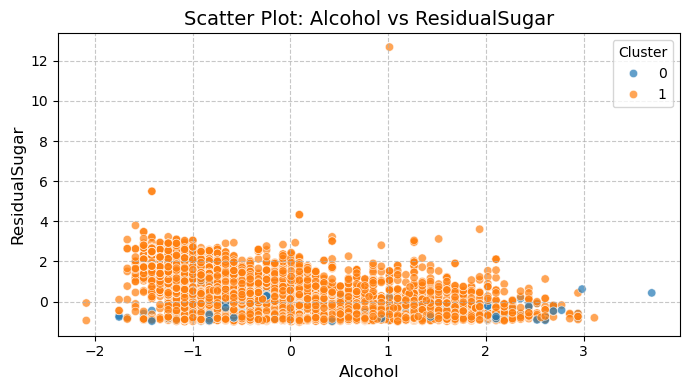

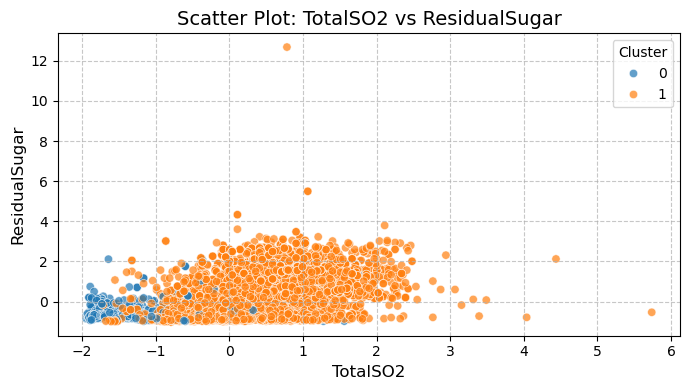

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

most_discriminatory_variables = ['Alcohol', 'TotalSO2', 'ResidualSugar'] 

# Generating scatter plots for each pair of most discriminatory variables
for i, var1 in enumerate(most_discriminatory_variables):
    for var2 in most_discriminatory_variables[i+1:]:
        plt.figure(figsize=(7, 4))
        sns.scatterplot(
            data=X, x=var1, y=var2, hue='Cluster', palette='tab10', alpha=0.7
        )
        plt.title(f'Scatter Plot: {var1} vs {var2}', fontsize=14)
        plt.xlabel(var1, fontsize=12)
        plt.ylabel(var2, fontsize=12)
        plt.legend(title='Cluster', loc='best')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

The scatter diagrams for the most discriminatory variables—Alcohol vs. TotalSO2, Alcohol vs. ResidualSugar, as well as TotalSO2 vs. ResidualSugar—emphasize the distinction between the two clusters that have been defined. Cluster 0 (blue) appears to represent data points with lower values for the variables, particularly Alcohol and ResidualSugar, suggesting wine of potentially inferior quality. Cluster 1 (orange) comprises data points with a diverse array of values, indicating that these variables are present in higher concentrations at medium-to-high levels. This implies that these wines may possess unique characteristics that are associated with quality. The clusters are clearly distinguished, although there is some overlap, which suggests that the clustering performance is moderate. These findings are consistent with previous histogram-based results, which further substantiates the discriminatory role of these variables in clustering.

**(d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster
analysis. (See https://scikit-learn.org/stable/modules/clustering.html for an overview of other clustering algorithms.)**


🔔 DBSCAN Results:
----------------------------------------
eps = 0.20: Clusters = 18, Silhouette Score = -0.28
eps = 0.50: Clusters = 48, Silhouette Score = -0.45
eps = 1.00: Clusters = 63, Silhouette Score = -0.37

🔔 Optimal eps: 0.2


🔔 Cluster Assignment Summary:
Cluster
-1     6351
 0        5
 1        6
 2        6
 3        5
 4        7
 5        7
 6        5
 7        6
 8        5
 9        5
 10       5
 11       8
 12       6
 13       7
 14       5
 15       8
 16       5
 17       5
Name: count, dtype: int64


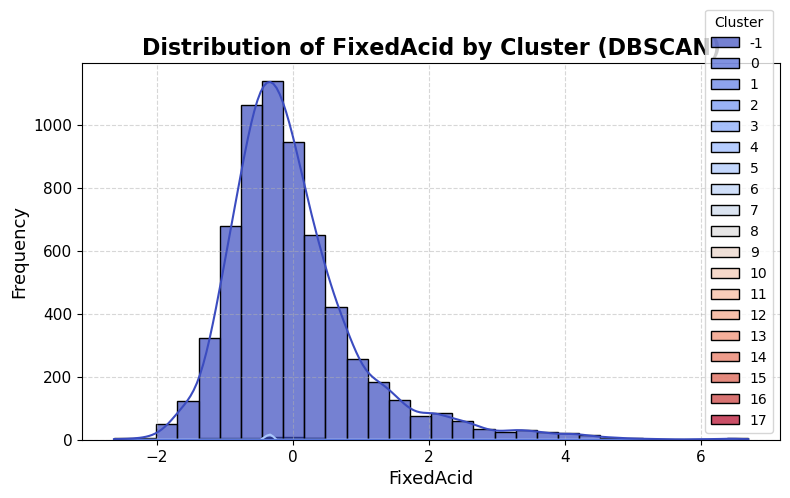

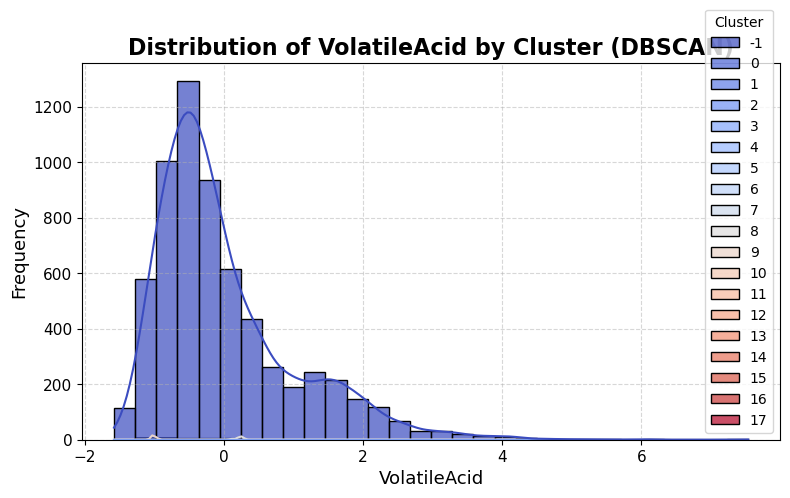

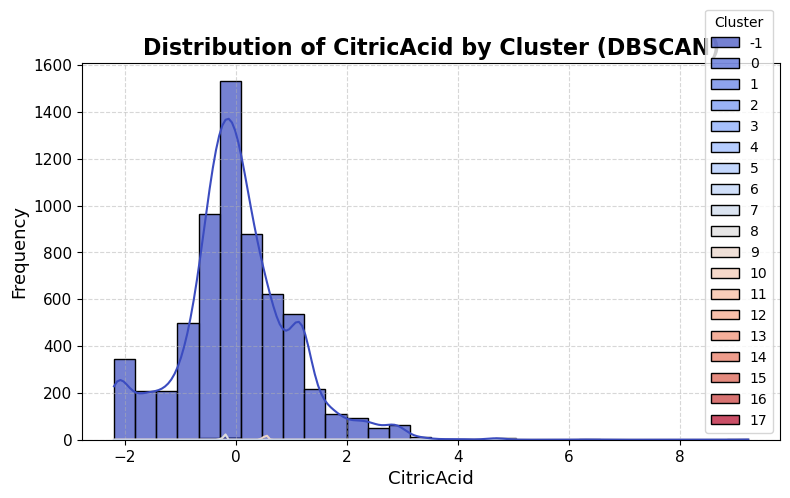

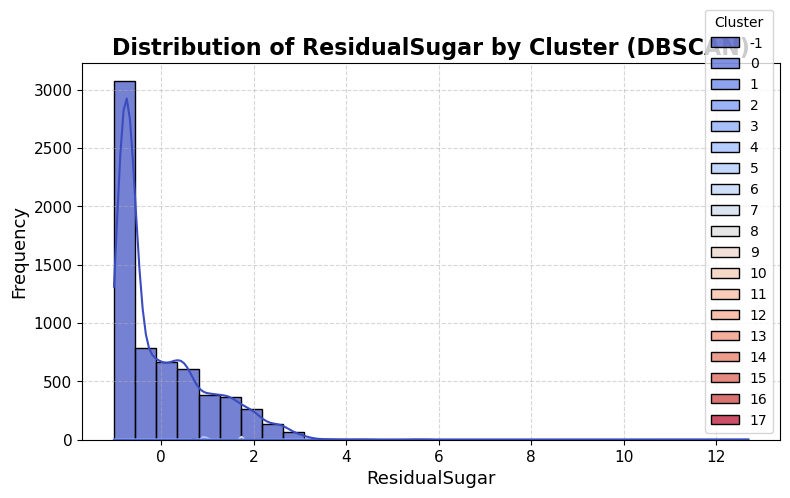

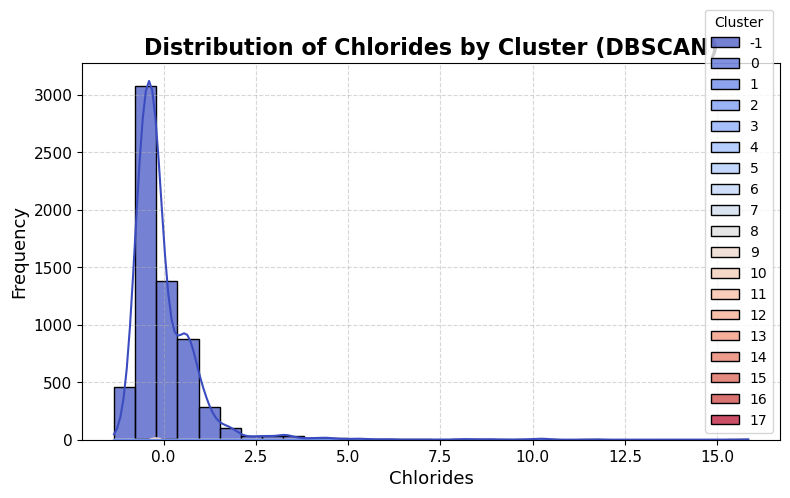

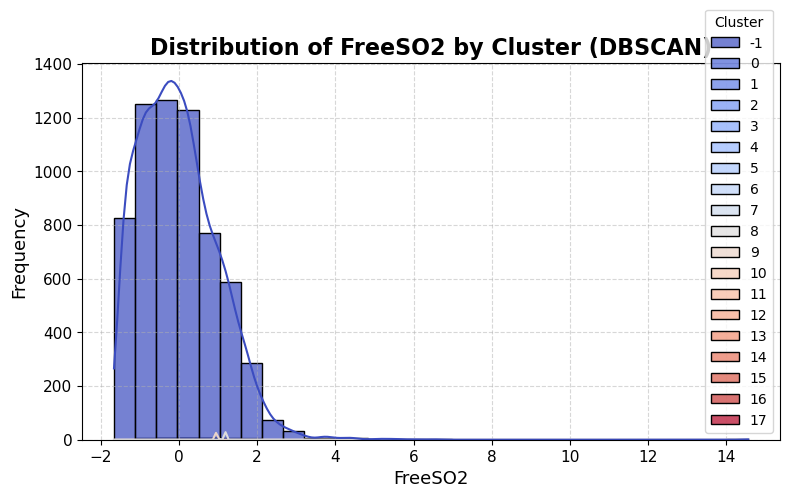

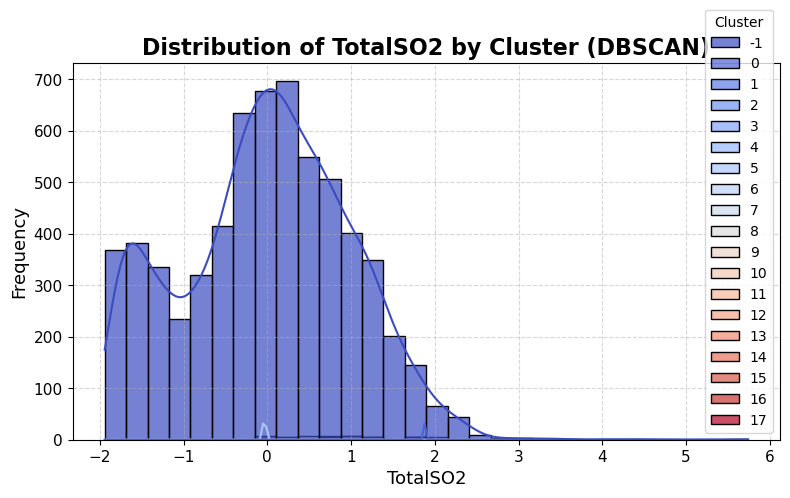

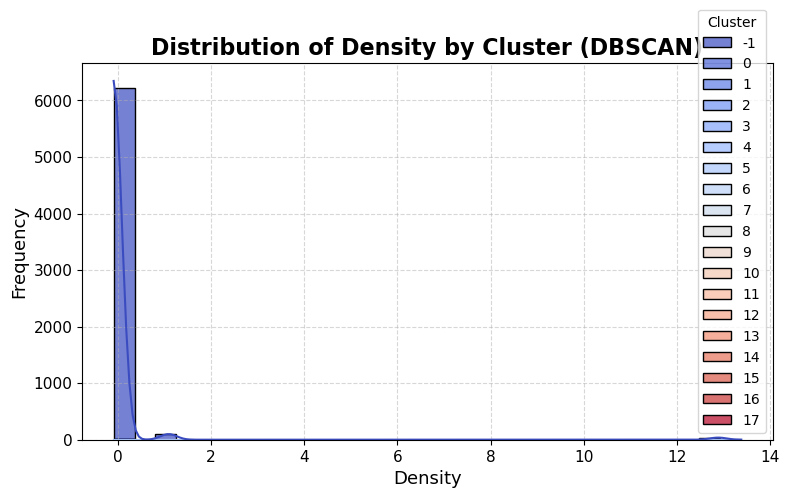

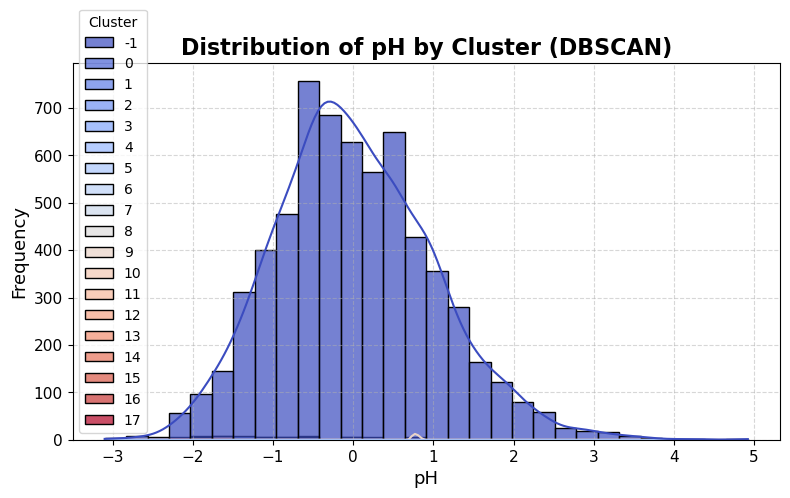

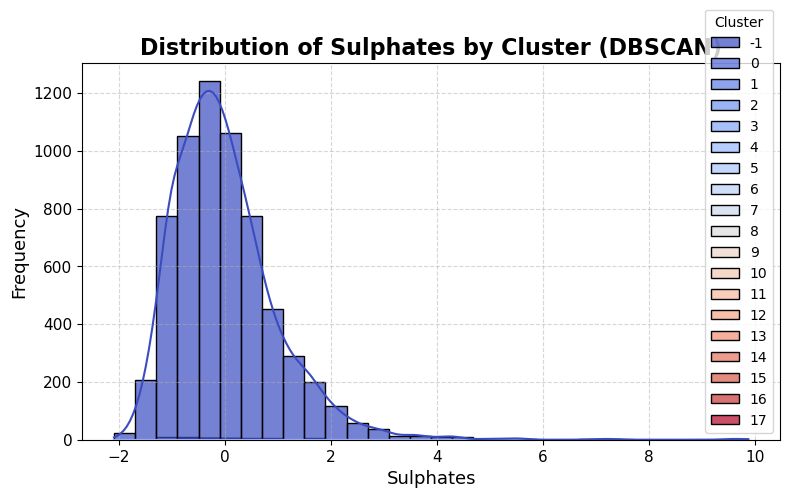

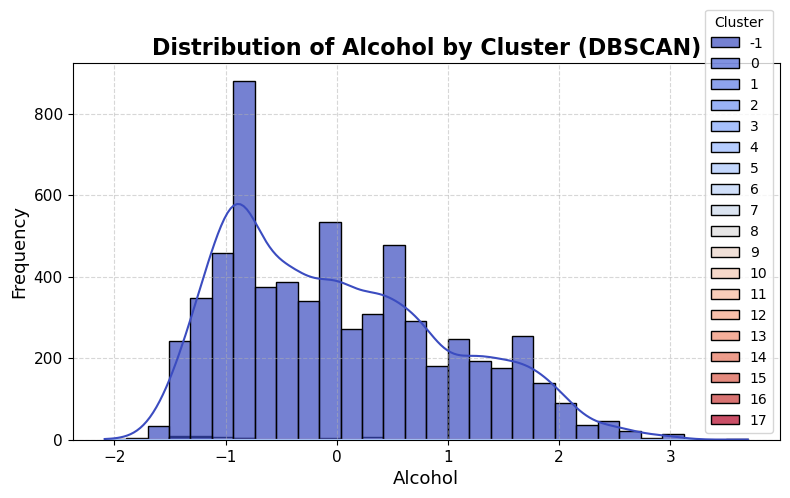

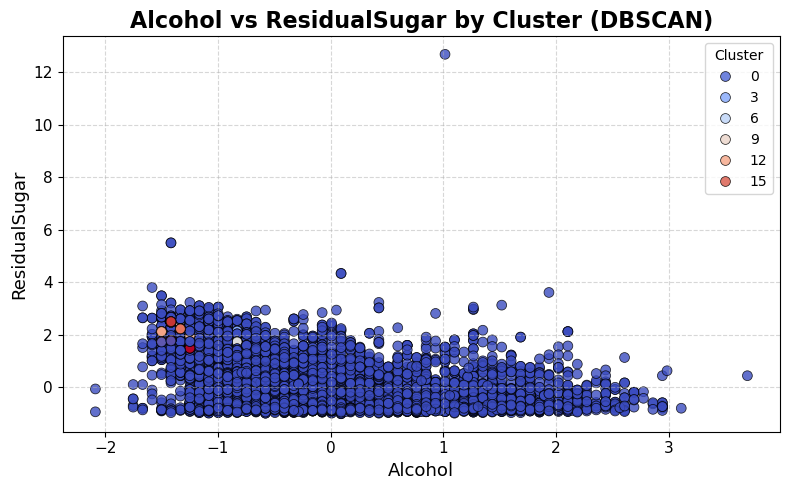

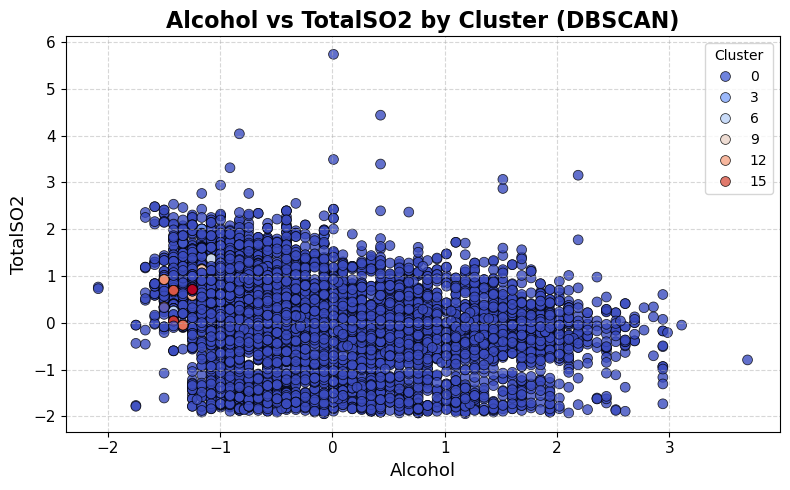

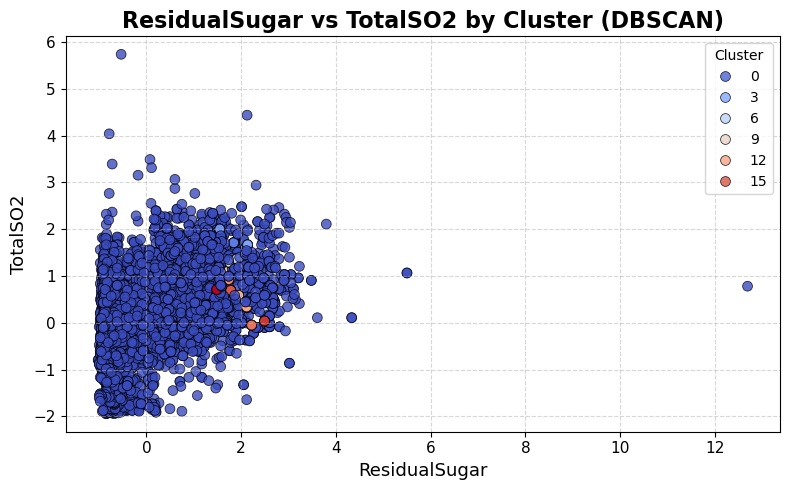

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X = standardized_predictors.copy().dropna()

# DBSCAN clustering with selected eps value
eps_values = [0.2, 0.5, 1.0]
results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    silhouette = silhouette_score(X, labels) if n_clusters > 1 else None
    results.append((eps, n_clusters, silhouette))

# Printing DBSCAN results
print("\n🔔 DBSCAN Results:")
print("-" * 40)
for eps, n_clusters, silhouette in results:
    if silhouette is not None:
        print(f"eps = {eps:.2f}: Clusters = {n_clusters}, Silhouette Score = {silhouette:.2f}")
    else:
        print(f"eps = {eps:.2f}: Clusters = {n_clusters}, Silhouette Score = N/A")

# Optimal eps based on silhouette score
optimal_eps = max(results, key=lambda x: x[2] if x[2] is not None else -1)[0]
print(f"\n🔔 Optimal eps: {optimal_eps}\n")

# Performing DBSCAN clustering using the optimal eps
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
X['Cluster'] = dbscan.fit_predict(X)

# Displaying cluster summary
print("\n🔔 Cluster Assignment Summary:")
print(X['Cluster'].value_counts().sort_index())

# Histogram for each variable by cluster
for col in X.columns[:-1]:  
    plt.figure(figsize=(8, 5))
    sns.histplot(data=X, x=col, hue='Cluster', kde=True, palette='coolwarm', alpha=0.7, bins=30)
    plt.title(f"Distribution of {col} by Cluster (DBSCAN)", fontsize=16, weight='bold')
    plt.xlabel(col, fontsize=13)
    plt.ylabel("Frequency", fontsize=13)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Scatter plot for the most discriminatory variables
discriminatory_vars = ['Alcohol', 'ResidualSugar', 'TotalSO2']  # Adjust variables as needed
for i in range(len(discriminatory_vars)):
    for j in range(i + 1, len(discriminatory_vars)):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(
            data=X, x=discriminatory_vars[i], y=discriminatory_vars[j],
            hue='Cluster', palette='coolwarm', alpha=0.8, s=50, edgecolor='k'
        )
        plt.title(f"{discriminatory_vars[i]} vs {discriminatory_vars[j]} by Cluster (DBSCAN)", fontsize=16, weight='bold')
        plt.xlabel(discriminatory_vars[i], fontsize=13)
        plt.ylabel(discriminatory_vars[j], fontsize=13)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()


The DBSCAN clustering algorithm provides valuable insights into the dataset’s structure. Using an optimal eps value of 0.2, DBSCAN identified 18 clusters along with a large proportion of noise points (cluster -1), which dominate the dataset. This indicates that much of the data lies in low-density regions, making it challenging to assign these points to meaningful clusters. The majority of discovered clusters are diminutive, including just 5 to 8 points, indicating that the dataset is deficient in a substantial density-based clustering framework. Histograms for variables like pH, VolatileAcid, and FixedAcid have overlapping distributions within clusters, suggesting these variables may possess restricted discriminatory capability. Similarly, scatter plots of Alcohol vs ResidualSugar and Alcohol vs TotalSO2 show dense clustering in regions dominated by larger clusters, such as 0 and 6, while smaller clusters and outliers are sparsely distributed.

Compared to DBSCAN, K-Means proves to be more effective for this dataset. While DBSCAN is well-suited for identifying noise and handling irregularly shaped clusters, the significant number of noise points and uneven cluster sizes in this dataset suggest that it lacks a clear density-based structure. K-Means, on the other hand, produced balanced and well-defined clusters, making it a better fit for the dataset. While DBSCAN excels at detecting sparse regions and noise, its ability to form meaningful and interpretable clusters is limited in this case, whereas K-Means provides clearer and more actionable results.


**I confirm that all work submitted is my own and that I have neither given, sought, nor received aid in relation to this assignment.**

**Beyza Kordan**